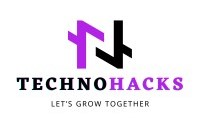

# Task 1 Data Cleaning

Author: Deepak Prajapat

## Import necessary library

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

## House Prices dataset

In [2]:
# load the dataset 
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')


In [3]:
# showing the shape of data
df_train.shape

(1460, 81)

## Explore the data

In [4]:
# train data
df_train  

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
# Describe the categorical columns
df_train.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [6]:
# Describe the numerical columns
df_train.describe(include=['int','float'])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# for submisson
test_id = df_test['Id']

# load the target variable
target = df_train['SalePrice'].reset_index(drop=True)
print(target)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [8]:
# drop unnecessary columns

df_test.drop(columns='Id',inplace=True)
df_train.drop(columns='Id',inplace=True)
df_train.drop(columns='SalePrice',inplace=True)

# merge both the train & test data

df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [9]:
# showing null values
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 79, dtype: int64

### Showing columns which has more than 45% missing values

In [10]:
# missing percentage of train data
null_df = round(df_train.isnull().sum()/len(df_train)*100,2).sort_values().to_frame().rename(columns=

                                                                                             {0:"Train % of Missing Values"})
# missing percentage of test data
null_df["Test % of Missing Values"] = round(df_test.isnull().sum()/len(df_test)*100,2)

In [11]:
# showing the columns with missing percentage
null_df[(null_df["Train % of Missing Values"]>45) | (null_df["Test % of Missing Values"]>45)]

,Train % of Missing Values,Test % of Missing Values
FireplaceQu,47.26,50.03
Fence,80.75,80.12
Alley,93.77,92.67
MiscFeature,96.30,96.50
PoolQC,99.52,99.79


## Eleminate the Columns

In [12]:
# drop the columns which has missing value more than 45%

cols = ['FireplaceQu','Fence','Alley','MiscFeature','PoolQC']
df.drop(columns=cols,inplace=True)

### Showing the columns which has missing values with percentage

In [13]:
# display all the columns which has missing values
null_df = df.isnull().sum()[df.isnull().sum()>0].sort_values().to_frame().rename(columns={0:"Total Missing values"})

# round the values till 2 decimal places
null_df["% of Missing Values"] = round(null_df["Total Missing values"]/len(df)*100,2)

# adding the columns of datatype
null_df["Feature Data Type"] = df[null_df.index.tolist()].dtypes
null_df

,Total Missing values,% of Missing Values,Feature Data Type
BsmtUnfSF,1,0.03,float64
GarageArea,1,0.03,float64
GarageCars,1,0.03,float64
KitchenQual,1,0.03,object
Electrical,1,0.03,object
TotalBsmtSF,1,0.03,float64
BsmtFinSF2,1,0.03,float64
BsmtFinSF1,1,0.03,float64
SaleType,1,0.03,object
Exterior1st,1,0.03,object


### Numerical Columns

In [14]:
numeric_cols = df.select_dtypes(include=['int','float'])
numeric_cols

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


### Categorical columns

In [15]:
categorical_cols = df.select_dtypes(include='object')
categorical_cols

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
2915,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
2916,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
2917,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


## Handling missing values

Filling missing values in categorical columns

In [16]:
# filling categorical columns
for col in ['GarageArea','GarageCars','GarageYrBlt']:
    df[col]=df[col].fillna(0)
    
for col in ['GarageType','GarageFinish','BsmtFinType2','GarageQual','GarageCond',
            'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1']:
    df[col] = df[col].fillna('None')
    
    
    

In [17]:
# filling missing values using imputer

cat_cols = ['Utilities','Exterior1st','Exterior2nd','MasVnrType','Electrical',
            'KitchenQual','Functional','SaleType']

imputer = SimpleImputer(strategy = 'most_frequent')

# fit the columns 
df[cat_cols]= imputer.fit_transform(df[cat_cols])

# grouping the columns and filled with most frequent
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

### Filling missing values in numerical columns

In [18]:
# grouping up columns and filled with median value.

df["LotFrontage"] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df["MasVnrArea"]  = df.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF1"]  = df.groupby("BsmtFinType1")["BsmtFinSF1"].transform(lambda x: x.fillna(x.median()))
df["BsmtFinSF2"]  = df.groupby("BsmtFinType2")["BsmtFinSF2"].transform(lambda x: x.fillna(x.median()))


In [19]:
# filled missing values
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)
df["TotalBsmtSF"]  = df["BsmtFinSF1"] + df["BsmtFinSF2"]
df["BsmtUnfSF"]    = df["BsmtUnfSF"].fillna(df["BsmtUnfSF"].median())

### Cheking missing values in data

In [20]:
print("Total Missing Values Left is:",df.isnull().sum().sum())

Total Missing Values Left is: 0


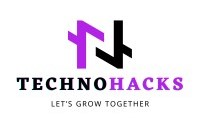